In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

import numpy as np
import matplotlib.pyplot as plt

from kurtosis import kurtosis
from projpursuit import projpursuit

import umap.umap_ as umap


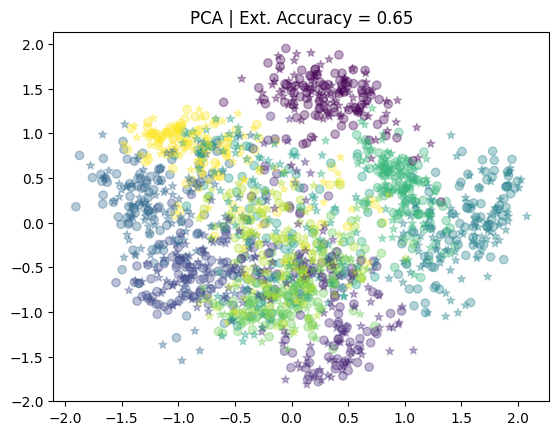

In [11]:
digits = load_digits()

X = digits.data
y = digits.target
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=42)

# starting PCA
# preprocessing the data: autoscaling
minmax = preprocessing.MinMaxScaler()
xTrainScaled = minmax.fit_transform(xTrain)
xTestScaled = minmax.transform(xTest)

# PCA
pca = PCA(n_components=2)
tTrain = pca.fit_transform(xTrainScaled)
tTest = pca.transform(xTestScaled)

#classification, PCA
clfpca = svm.SVC()
clfpca.fit(tTrain, yTrain)
pcaPredicted = clfpca.predict(tTest)
pcaAcc = accuracy_score(pcaPredicted, yTest)

plt.scatter(tTrain[:, 0], tTrain[:, 1], c=yTrain, alpha=0.35)
plt.scatter(tTest[:, 0], tTest[:, 1], c=yTest, marker="*", alpha=0.35)
plt.title("PCA | Ext. Accuracy = %.2f" % pcaAcc)

plt.show()


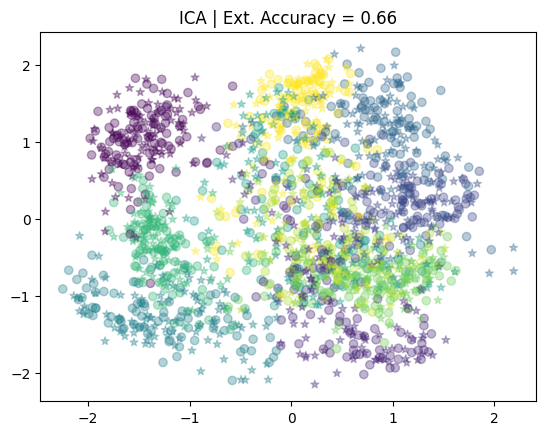

In [12]:
#ICA
ica = FastICA(n_components=2)
iTrain = ica.fit_transform(xTrain)
iTest = ica.transform(xTest)

clfica = svm.SVC()
clfica.fit(iTrain, yTrain)
icaPredicted = clfica.predict(iTest)
icaAcc = accuracy_score(icaPredicted, yTest)

plt.scatter(iTrain[:, 0], iTrain[:, 1], c=yTrain, alpha=0.35)
plt.scatter(iTest[:, 0], iTest[:, 1], c=yTest, marker="*", alpha=0.35)
plt.title("ICA | Ext. Accuracy = %.2f" % icaAcc)

plt.show()

Performing recentered multivariate PP


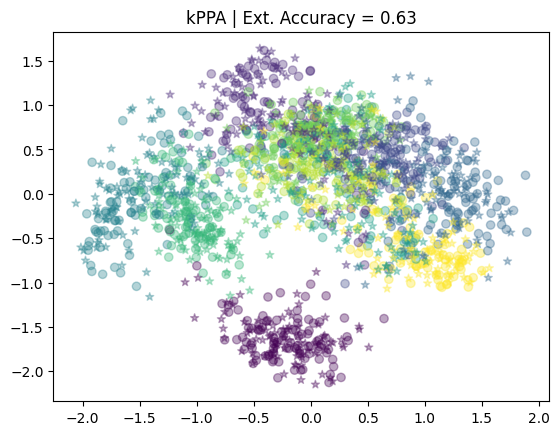

In [13]:
#kPPA
mnCn = preprocessing.StandardScaler(with_mean=True, with_std=False)
xMnCnTrain = mnCn.fit_transform(xTrainScaled)
xMnCnTest = mnCn.transform(xTestScaled)

Ttrain, V, dicton = projpursuit(xMnCnTrain, Meth="Mul", CenMeth="Rec", VSorth="VO", MaxMin="Min", StSh="Sh")

Ttest = xMnCnTest @ V

clfppa = svm.SVC()
clfppa.fit(Ttrain, yTrain)
ppaPredicted = clfppa.predict(Ttest)
ppaAcc = accuracy_score(ppaPredicted, yTest)

plt.scatter(Ttrain[:, 0], Ttrain[:, 1], c=yTrain, alpha=0.35)
plt.scatter(Ttest[:, 0], Ttest[:, 1], c=yTest, marker="*", alpha=0.35)
plt.title("kPPA | Ext. Accuracy = %.2f" % ppaAcc)

plt.show()

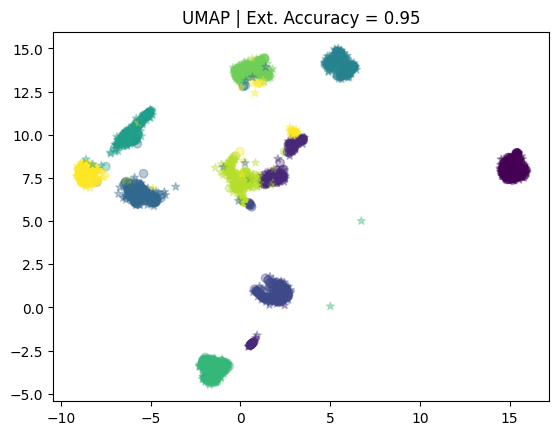

In [14]:
#UMAP
ump = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1)
utrain = ump.fit_transform(xTrain)
utest = ump.transform(xTest)

clfump = svm.SVC()
clfump.fit(utrain, yTrain)
umpPredicted = clfump.predict(utest)
umpAcc = accuracy_score(umpPredicted, yTest)

plt.scatter(utrain[:, 0], utrain[:, 1], c=yTrain, alpha=0.35)
plt.scatter(utest[:, 0], utest[:, 1], c=yTest, marker="*", alpha=0.35)
plt.title("UMAP | Ext. Accuracy = %.2f" % umpAcc)

plt.show()